In [199]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datasets import load_dataset
import scipy.stats as st
import ast

In [201]:
# Function to load a cleaned dataset from a pickle (.pkl) file
# Input: path (str) - file path to the pickle file
# Output: pandas DataFrame containing the loaded data

def load_data(path):
    """
    Loads a cleaned dataset from a pickle file.

    Parameters:
    path (str): Path to the .pkl file.

    Returns:
    pd.DataFrame: Loaded dataset as a pandas DataFrame.
    """
    return pd.read_pickle(path)

In [202]:
# Checking the working directory

import os

print(os.getcwd())

c:\Users\lisad\OneDrive\US_Data_Job_Listing_2022_to_2025


In [203]:
# Downloading the Pickle version cleanned dataset

df = load_data(r'c:\Users\lisad\OneDrive\US_Data_Job_Listing_2022_to_2025\df_clean.pkl')

In [204]:
# Create a copy of the original DataFrame for analysis purposes

df_copy = df.copy()

In [205]:
# Display summary information of the DataFrame df_copy

df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61953 entries, 0 to 61952
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           61953 non-null  int64         
 1   index                61953 non-null  int64         
 2   title                61953 non-null  object        
 3   company_name         61953 non-null  object        
 4   location             61916 non-null  object        
 5   via                  61944 non-null  object        
 6   description          61953 non-null  object        
 7   extensions           61953 non-null  object        
 8   job_id               61953 non-null  object        
 9   thumbnail            38194 non-null  object        
 10  posted_at            61763 non-null  object        
 11  schedule_type        61707 non-null  object        
 12  work_from_home       27980 non-null  object        
 13  salary               10088 non-

In [206]:
# Filter df_copy DataFrame to include only data for the year 2022

df_2022 = df_copy[df_copy['year'] == 2022].copy()

In [207]:
# Displaying column names from the filtered df_2022 for analysis

df_2022.columns

Index(['Unnamed: 0', 'index', 'title', 'company_name', 'location', 'via',
       'description', 'extensions', 'job_id', 'thumbnail', 'posted_at',
       'schedule_type', 'work_from_home', 'salary', 'search_term', 'date_time',
       'search_location', 'commute_time', 'salary_pay', 'salary_rate',
       'salary_avg', 'salary_min', 'salary_max', 'salary_hourly',
       'salary_yearly', 'salary_standardized', 'description_tokens', 'date',
       'year', 'month', 'job_skills', 'remote_work', 'clean_title',
       'seniority_level', 'employment_type', 'website'],
      dtype='object')

In [208]:
# Display summary informations of the filtered df_2022

df_2022.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5488 entries, 39058 to 61951
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           5488 non-null   int64         
 1   index                5488 non-null   int64         
 2   title                5488 non-null   object        
 3   company_name         5488 non-null   object        
 4   location             5483 non-null   object        
 5   via                  5488 non-null   object        
 6   description          5488 non-null   object        
 7   extensions           5488 non-null   object        
 8   job_id               5488 non-null   object        
 9   thumbnail            3031 non-null   object        
 10  posted_at            5488 non-null   object        
 11  schedule_type        5466 non-null   object        
 12  work_from_home       2725 non-null   object        
 13  salary               987 non-null

In [209]:
# Verifying the descriptive statistics for df_2022 columns

df_2022.describe()

,Unnamed: 0,index,date_time,commute_time,salary_avg,salary_min,salary_max,salary_hourly,salary_yearly,salary_standardized,year,month
count,5488.000000,5488.000000,5488,0.0,987.000000,916.000000,916.000000,606.000000,377.000000,987.000000,5488.0,5488.000000
mean,50266.338739,1056.330904,2022-12-03 11:35:26.836915712,NaN,40557.162036,33631.937445,48844.617293,46.875536,106040.125610,100664.056084,2022.0,11.606596
min,39058.000000,0.000000,2022-11-04 03:40:11.151943,NaN,10.000000,8.000000,12.000000,10.000000,42500.000000,20800.000000,2022.0,11.000000
25%,43706.750000,535.750000,2022-11-16 04:00:24.047298048,NaN,38.000000,30.000000,50.000000,31.000000,85050.000000,69680.000000,2022.0,11.000000
50%,52228.500000,1021.500000,2022-12-08 04:00:18.460689664,NaN,65.000000,55.000000,75.000000,45.000000,103781.000000,100000.000000,2022.0,12.000000
75%,56479.250000,1562.250000,2022-12-19 04:00:25.544441088,NaN,92487.750000,76798.000000,110000.000000,57.500000,122470.500000,122470.500000,2022.0,12.000000
max,61951.000000,2625.000000,2022-12-31 04:00:31.846389,NaN,217500.000000,185000.000000,260000.000000,135.000000,217500.000000,280800.000000,2022.0,12.000000
std,7024.225460,624.561202,NaN,NaN,54898.705563,45477.361595,66027.094002,22.070814,30763.210293,40930.019377,0.0,0.488550


In [210]:
# Record keeping for filtered data from df_copy Data Frame

print(f'Filtered {len(df_2022):,} job postings for year 2022')

Filtered 5,488 job postings for year 2022


In [211]:
# Check Data Frame df_2022's filtered data validation

assert df_2022['year'].nunique() == 1 and df_2022['year'].iloc[0] == 2022

In [212]:
# Log shape changes between df_copy and df_2022 Data Frames

print(f'Original: {df_copy.shape[0]:,} rows -> 2022 subset: {df_2022.shape[0]:,} rows')

Original: 61,953 rows -> 2022 subset: 5,488 rows


In [213]:
# Select and reorder relevant columns for analysis, and reset index for clarity

df_2022 = df_2022[[
'date_time','date', 'year', 'month',
'company_name', 'location','website',
'employment_type','remote_work', 
'seniority_level','clean_title',
'salary_standardized','salary_hourly', 
'salary_yearly', 'job_skills'
]].reset_index(drop=True)

# Capturing the Most In-Demand Skills for Data Positions in the U.S. in 2022

In [214]:
# Count job titles in df_2022
# Generate a count of each unique cleaned job title

df_2022['clean_title'].value_counts().reset_index(name='title_total')
df_2022_title_count = df_2022['clean_title'].value_counts().reset_index(name='title_total')

In [215]:
# Preview top job titles by frequency

df_2022_title_count.head(10)

,clean_title,title_total
0,Data Analyst,3879
1,Business Analyst,485
2,Data Scientist,194
3,Marketing Analyst,188
4,Data Engineer,134
5,Healthcare Analyst,94
6,Financial Analyst,73
7,Statistical Analyst,72
8,Operations Research Analyst,50
9,Operations Data Analyst,47


In [216]:
# Expand the 'job_skills' list into individual rows
# Allows counting each skill independently across job postings

df_2022_skill = df_2022.explode('job_skills')
df_2022_skill[['clean_title', 'job_skills']]

,clean_title,job_skills
0,Operations Data Analyst,excel
0,Operations Data Analyst,spss
1,Operations Data Analyst,power_bi
1,Operations Data Analyst,excel
2,Operations Data Analyst,power_bi
...,...,...
5484,Marketing Analyst,r
5484,Marketing Analyst,python
5485,Data Analyst,NaN
5486,Data Analyst,NaN


In [217]:
# Count how often each skill appears for each job title

df_2022_skill_count = (
    df_2022_skill
    .groupby(['job_skills', 'clean_title'])
    .size()
    .reset_index(name='skill_count')
)

df_2022_skill_count

,job_skills,clean_title,skill_count
0,airflow,Business Analyst,3
1,airflow,Data Analyst,36
2,airflow,Data Engineer,10
3,airflow,Data Governance Analyst,1
4,airflow,Data Scientist,6
...,...,...,...
762,word,Operations Research Analyst,6
763,word,Risk Analyst,1
764,word,Statistical Analyst,4
765,word,Supply Chain Analyst,2


In [218]:
# Merge with total job title counts to calculate percentages

df_2022_skill_percent = pd.merge(
    df_2022_skill_count, 
    df_2022_title_count, 
    how='left', 
    on='clean_title'
)
df_2022_skill_percent

,job_skills,clean_title,skill_count,title_total
0,airflow,Business Analyst,3,485
1,airflow,Data Analyst,36,3879
2,airflow,Data Engineer,10,134
3,airflow,Data Governance Analyst,1,11
4,airflow,Data Scientist,6,194
...,...,...,...,...
762,word,Operations Research Analyst,6,50
763,word,Risk Analyst,1,9
764,word,Statistical Analyst,4,72
765,word,Supply Chain Analyst,2,13


In [219]:
# Calculate percentage of job listings requiring each skill (per title)

df_2022_skill_percent['skill_percentage'] = round(100* df_2022_skill_percent['skill_count'] / 
                                                  df_2022_skill_percent['title_total'], 2)

df_2022_skill_percent

,job_skills,clean_title,skill_count,title_total,skill_percentage
0,airflow,Business Analyst,3,485,0.62
1,airflow,Data Analyst,36,3879,0.93
2,airflow,Data Engineer,10,134,7.46
3,airflow,Data Governance Analyst,1,11,9.09
4,airflow,Data Scientist,6,194,3.09
...,...,...,...,...,...
762,word,Operations Research Analyst,6,50,12.00
763,word,Risk Analyst,1,9,11.11
764,word,Statistical Analyst,4,72,5.56
765,word,Supply Chain Analyst,2,13,15.38


In [220]:
# Renaming columns for clarity

df_2022_skill_percent.rename(columns={
    'job_skills': 'skill',
    'clean_title': 'job_title'
}, inplace=True)

df_2022_skill_percent

,skill,job_title,skill_count,title_total,skill_percentage
0,airflow,Business Analyst,3,485,0.62
1,airflow,Data Analyst,36,3879,0.93
2,airflow,Data Engineer,10,134,7.46
3,airflow,Data Governance Analyst,1,11,9.09
4,airflow,Data Scientist,6,194,3.09
...,...,...,...,...,...
762,word,Operations Research Analyst,6,50,12.00
763,word,Risk Analyst,1,9,11.11
764,word,Statistical Analyst,4,72,5.56
765,word,Supply Chain Analyst,2,13,15.38


In [221]:
# Sorting skills 

df_2022_skill_count.sort_values(by='skill_count', ascending=False, inplace=True)
df_2022_skill_count

,job_skills,clean_title,skill_count
627,sql,Data Analyst,2026
122,excel,Data Analyst,1478
381,power_bi,Data Analyst,1173
437,python,Data Analyst,1163
681,tableau,Data Analyst,1050
...,...,...,...
22,assembly,Healthcare Analyst,1
20,assembly,Business Analyst,1
19,asp.net,Operations Data Analyst,1
18,asp.net,Data Engineer,1


In [222]:
# Capturing Top 5 job titles in 2022

job_titles_2022 = df_2022_skill_count['clean_title'].dropna().unique().tolist()
job_titles_2022 = sorted(job_titles_2022[:5])
job_titles_2022

['Business Analyst',
 'Data Analyst',
 'Data Engineer',
 'Data Scientist',
 'Marketing Analyst']

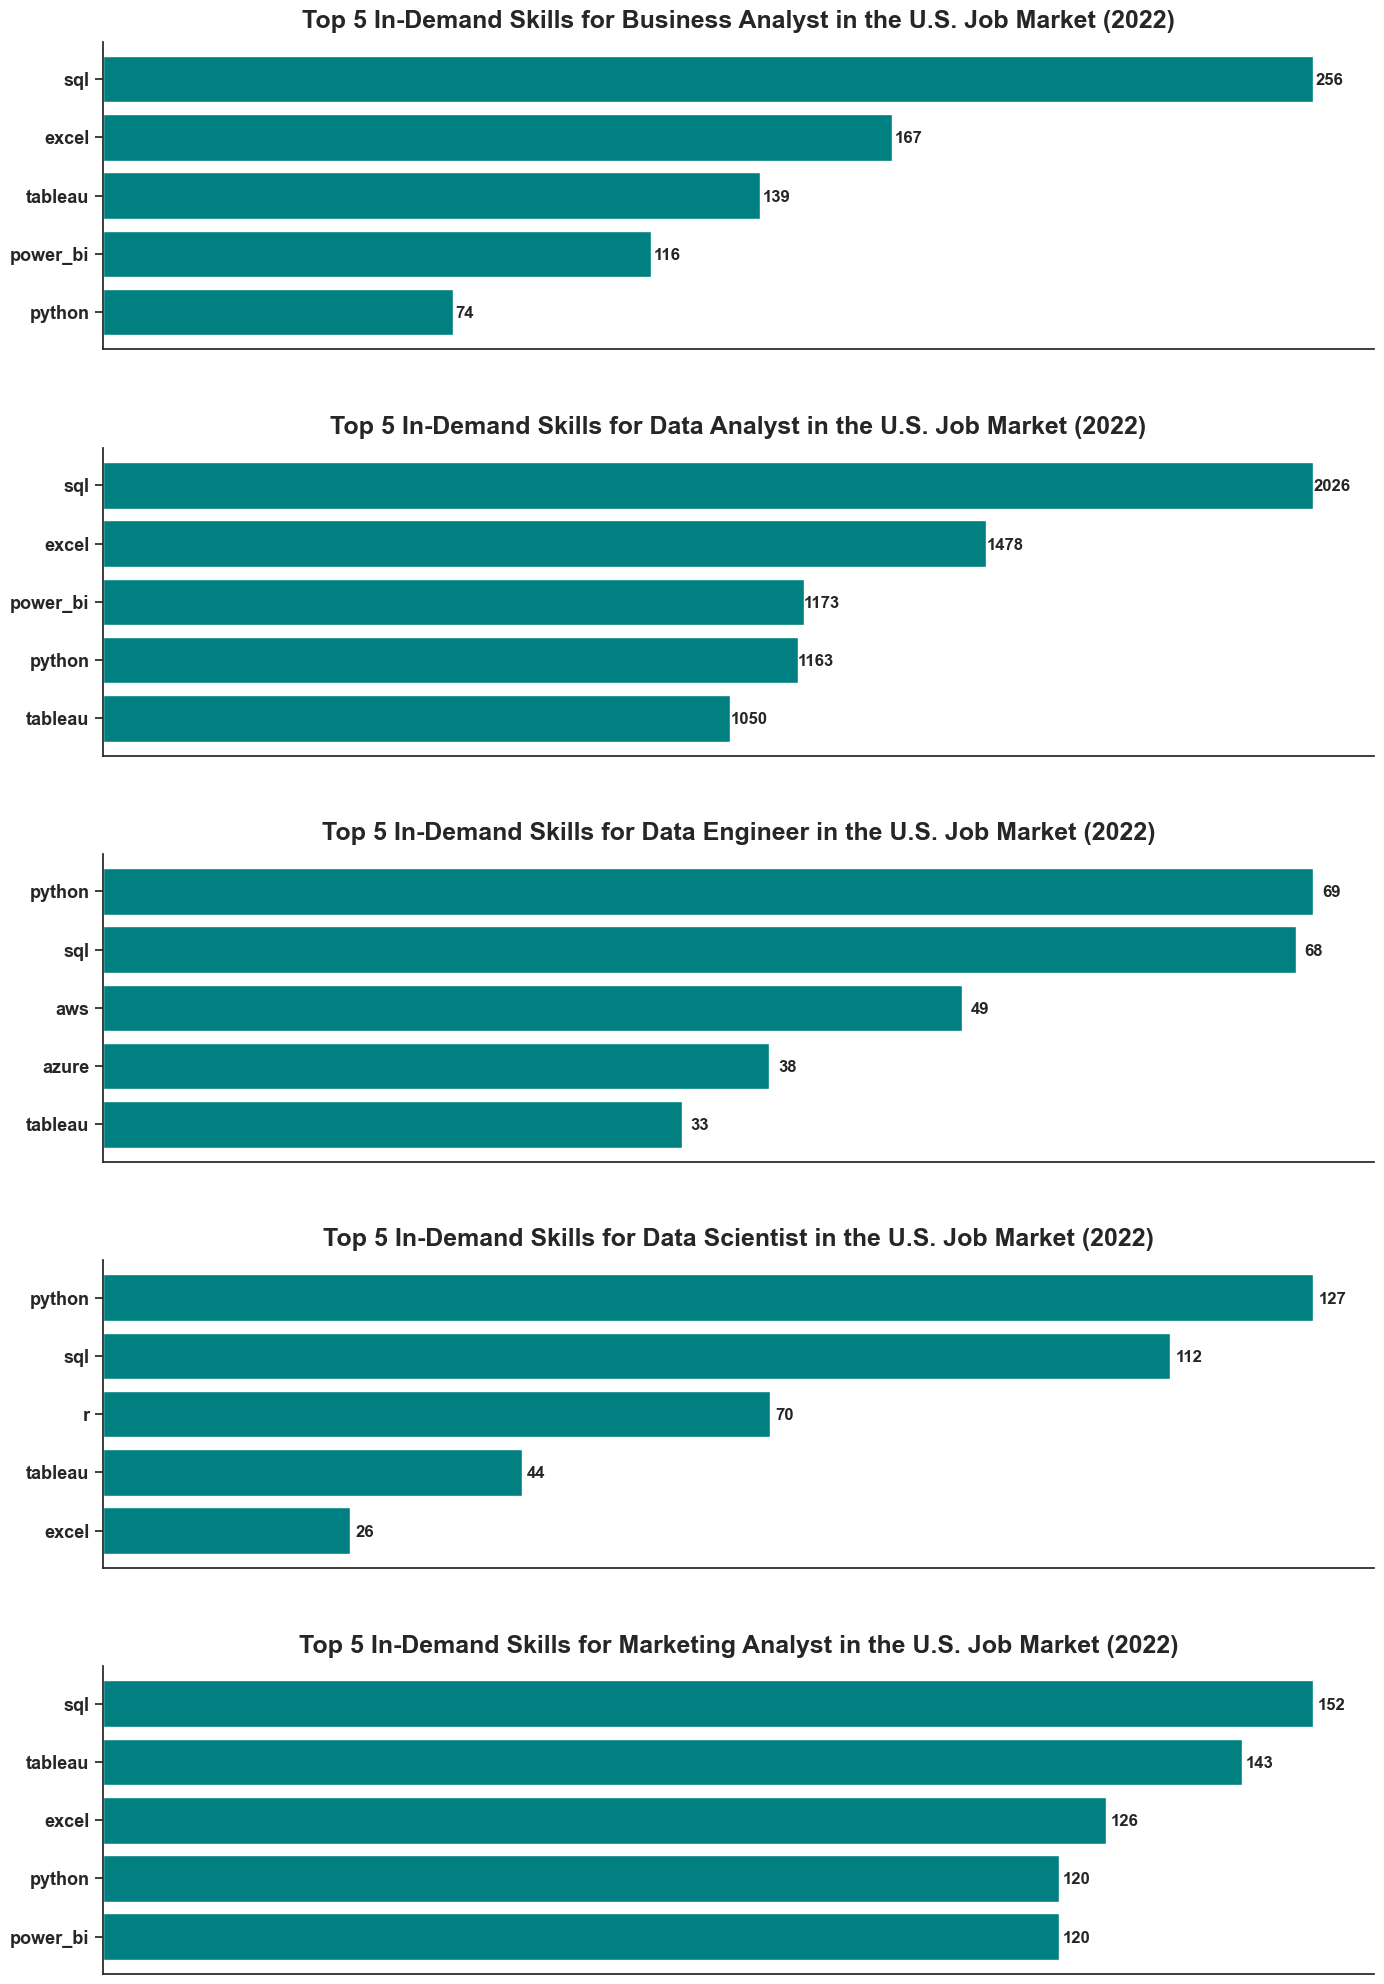

In [269]:
# Most Sought-After Skills for Leading Data Roles in 2022

# Create subplots
fig, ax = plt.subplots(len(job_titles_2022), 1, figsize=(14, 20), sharex=False)

# Ensure ax is always iterable
if len(job_titles_2022) == 1:
    ax = [ax]

for i, job_title in enumerate(job_titles_2022):
    # Filter and sort top 5 skills
    df_2022_plot = df_2022_skill_count[
        df_2022_skill_count['clean_title'] == job_title
    ].nlargest(5, 'skill_count')

    # Plot with ax[i]
    bars = ax[i].barh(
        df_2022_plot['job_skills'],
        df_2022_plot['skill_count'],
        color='teal'
    )

    # Add value labels
    for bar in bars:
        width = bar.get_width()
        y = bar.get_y() + bar.get_height() / 2
        ax[i].text(
            width + 0.5, y, f'{int(width)}',
            va='center_baseline', 
            fontsize=12, 
            fontweight='bold'
        )
        
    # Despine the right side
    for axes in ax:
        sns.despine(ax=axes, right=True)

    # Customize each subplot (← moved inside the loop)
    ax[i].invert_yaxis()
    ax[i].axes.get_xaxis().set_visible(False)
    ax[i].set_ylabel('')
    ax[i].set_title(f'Top 5 In-Demand Skills for {job_title} in the U.S. Job Market (2022)',
                    fontsize=18, fontweight='bold', pad=10
    )
    
 # Make skill names bold and larger
    ax[i].tick_params(axis='y', labelsize=13)
    for label in ax[i].get_yticklabels():
        label.set_fontweight('bold')


plt.tight_layout(h_pad=4)
plt.show()

C:\Users\lisad\AppData\Local\Temp\ipykernel_5072\1411684098.py:33: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(


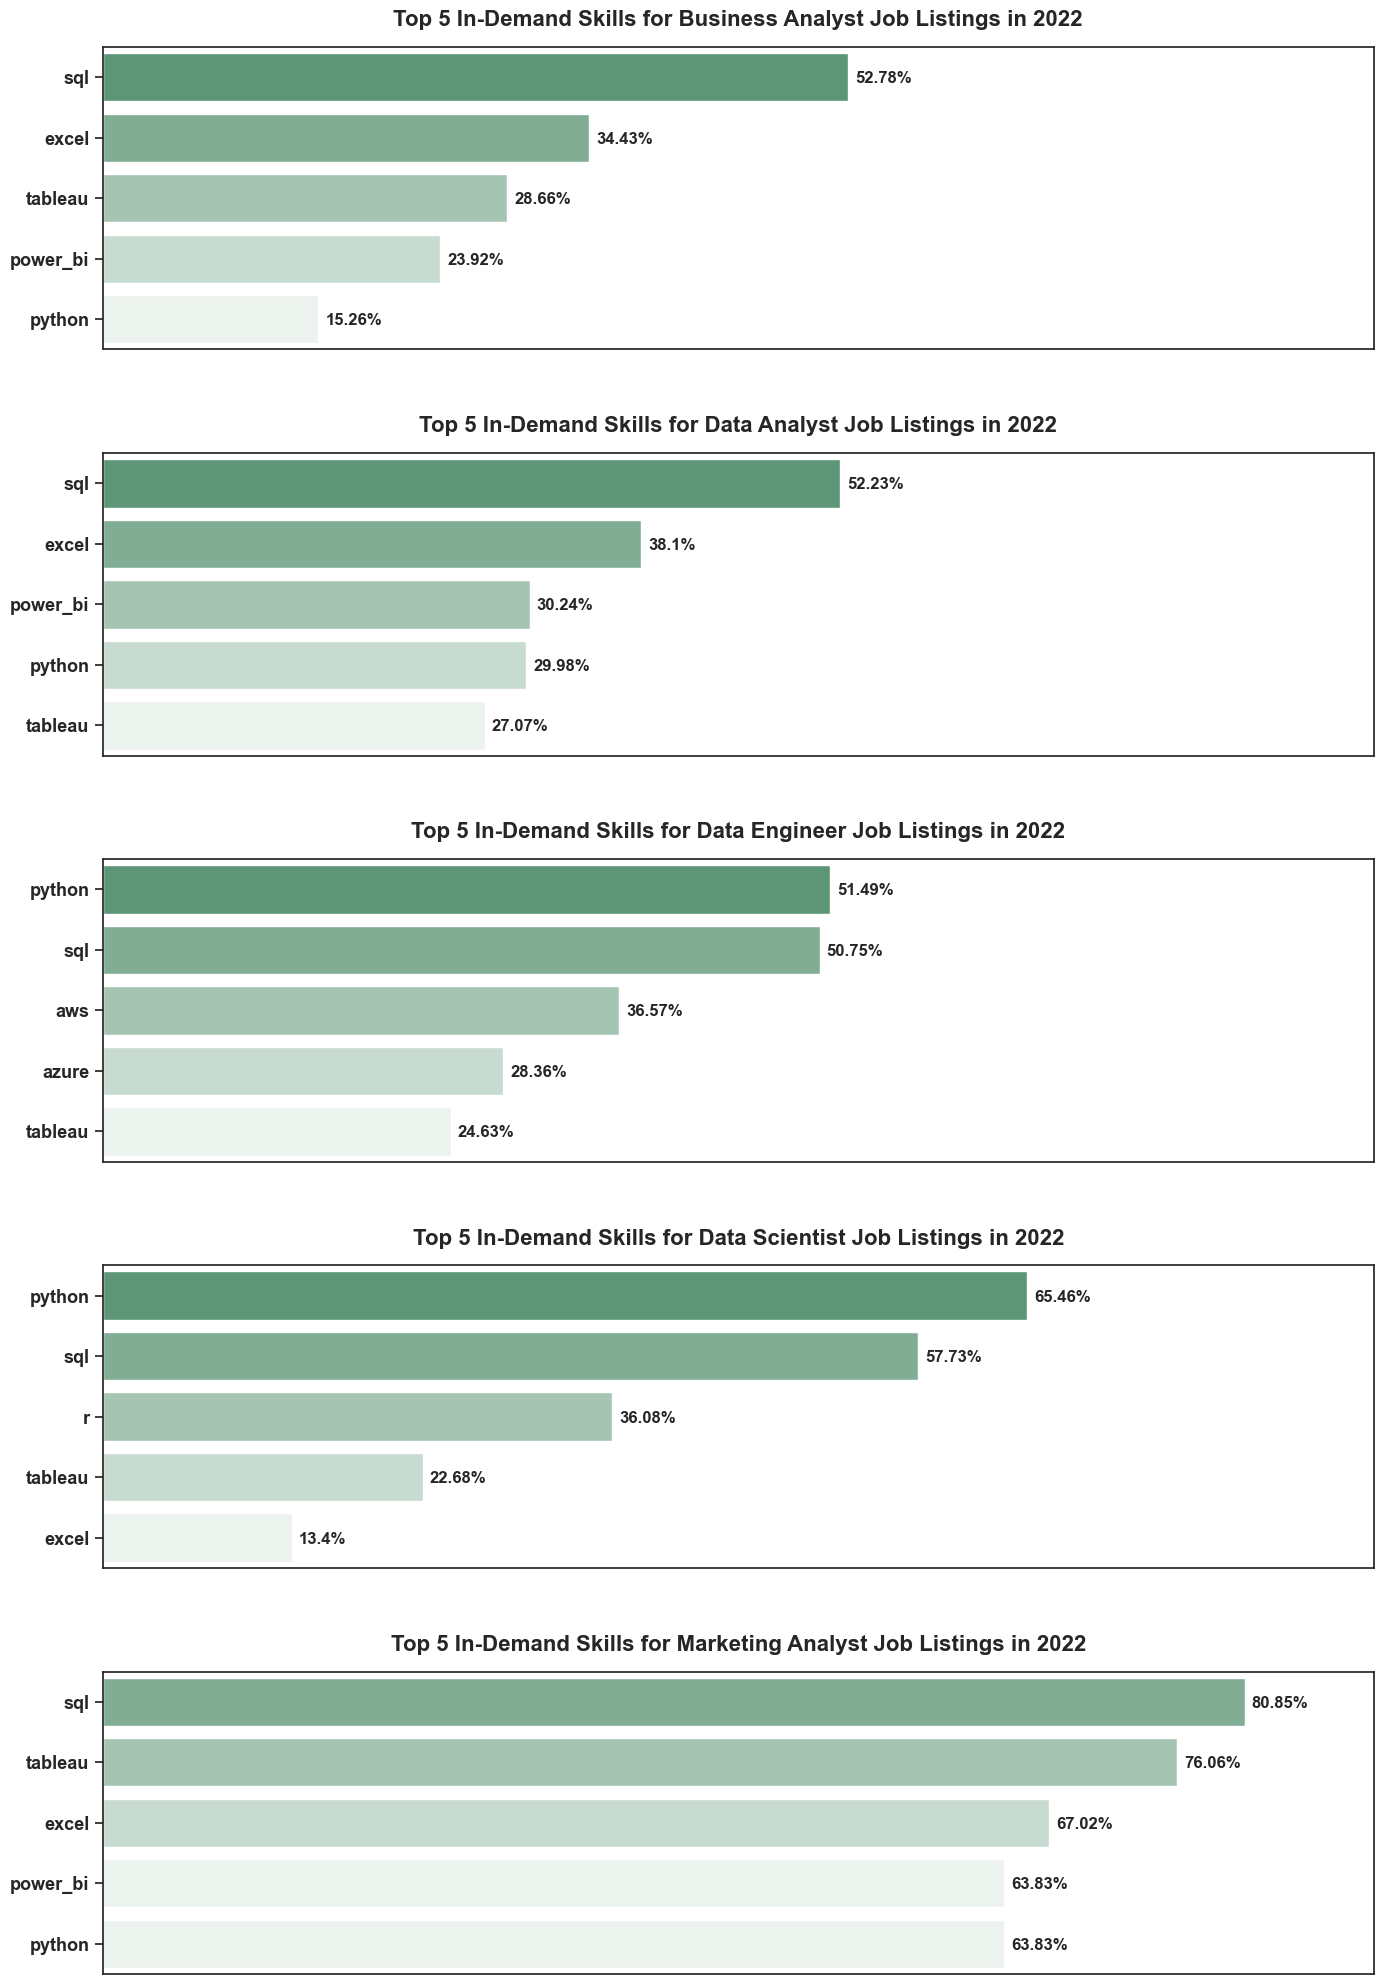

In [270]:
# Key Skills Driving Demand in Data Roles (2022)

# Set the overall theme
sns.set_theme(style='ticks')

# Create subplots
fig, ax = plt.subplots(len(job_titles_2022), 1, figsize=(14, 20), sharex=False)


# Ensuring ax is always iterable
if len(job_titles_2022) == 1:
    ax = [ax]


for i, job_title in enumerate(job_titles_2022):
    # Filter and sort skill counts for the current job title
    df_2022_bar_plot = df_2022_skill_percent[
        df_2022_skill_percent['job_title'] == job_title
    ].nlargest(5, 'skill_count')


    # Add percentage labels to each bar
    for index, value in enumerate (df_2022_bar_plot['skill_percentage']):
        ax[i].text(value + 0.5, index, f'{value}%', 
                   va='center_baseline', fontsize=12, fontweight='bold')

        

    # Plot horizontal bar chart
    num_lines = df_2022_bar_plot.shape[1]  # number of columns (lines)
    palette = sns.light_palette('seagreen')[:num_lines]

    sns.barplot(
        data=df_2022_bar_plot,
        x='skill_percentage',
        y='skill',
        ax= ax[i],
        hue='skill_count',
        palette=palette

    )
    
    # Title and axis formatting
    ax[i].invert_xaxis()
    ax[i].set_xticks([])
    ax[i].set_title(f'Top 5 In-Demand Skills for {job_title} Job Listings in 2022', 
                    fontsize=16, fontweight='bold', pad=15)
    ax[i].set_xlim(0, 90)
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_ylabel('')
    
     # Make skill names bold and larger
    ax[i].tick_params(axis='y', labelsize=13)
    for label in ax[i].get_yticklabels():
        label.set_fontweight('semibold')


# Final layout tweaks   
plt.tight_layout(h_pad=4)  # Adding vertical padding between plots
plt.show()

In [227]:
# Explode 'job_skills' list into individual rows
# This allows each skill in a posting to be analyzed separately

df_2022_explode = df_2022.explode('job_skills')
df_2022_explode.head(5)

,date_time,date,year,month,company_name,location,website,employment_type,remote_work,seniority_level,clean_title,salary_standardized,salary_hourly,salary_yearly,job_skills
0,2022-11-11 04:00:18.720591,2022-11-11,2022,11,Harnham US,United States,harnham,Full-Time,False,Manager,Operations Data Analyst,NaN,NaN,NaN,excel
0,2022-11-11 04:00:18.720591,2022-11-11,2022,11,Harnham US,United States,harnham,Full-Time,False,Manager,Operations Data Analyst,NaN,NaN,NaN,spss
1,2022-11-21 04:00:16.457704,2022-11-21,2022,11,Virgin Galactic,United States,virgin galactic careers,Full-Time,False,Senior,Operations Data Analyst,NaN,NaN,NaN,power_bi
1,2022-11-21 04:00:16.457704,2022-11-21,2022,11,Virgin Galactic,United States,virgin galactic careers,Full-Time,False,Senior,Operations Data Analyst,NaN,NaN,NaN,excel
2,2022-12-04 04:00:18.029007,2022-12-04,2022,12,Virgin Galactic,United States,virgin galactic careers,Full-Time,False,Senior,Operations Data Analyst,NaN,NaN,NaN,power_bi


In [228]:
# Create pivot table of monthly skill counts
# Rows = month, Columns = individual skills, Values = count of mentions

df_2022_pivot = df_2022_explode.pivot_table(
    index='month',
    columns='job_skills',
    aggfunc='size',
    fill_value=0
)

df_2022_pivot

job_skills,airflow,alteryx,asp.net,assembly,atlassian,aurora,aws,azure,bash,bigquery,...,typescript,unix,unix/linux,vb.net,vba,visio,visual_basic,vue,vue.js,word
month,,,,,,,,,,,,,,,,,,,,,
11,19,45,3,4,6,4,133,124,6,23,...,0,14,3,1,104,31,5,0,0,150
12,38,93,3,3,14,3,196,179,7,42,...,2,24,7,2,49,36,10,6,1,233


In [229]:
# Add a row labeled 'Total', to calculate total count

df_2022_pivot.loc['Total']  = df_2022_pivot.sum()
df_2022_pivot

job_skills,airflow,alteryx,asp.net,assembly,atlassian,aurora,aws,azure,bash,bigquery,...,typescript,unix,unix/linux,vb.net,vba,visio,visual_basic,vue,vue.js,word
month,,,,,,,,,,,,,,,,,,,,,
11,19,45,3,4,6,4,133,124,6,23,...,0,14,3,1,104,31,5,0,0,150
12,38,93,3,3,14,3,196,179,7,42,...,2,24,7,2,49,36,10,6,1,233
Total,57,138,6,7,20,7,329,303,13,65,...,2,38,10,3,153,67,15,6,1,383


In [230]:
# Sort column['job_skill'] by total across all months

df_2022_pivot[df_2022_pivot.loc['Total'].sort_values(ascending=False).index]

df_2022_pivot = df_2022_pivot[df_2022_pivot
                              .loc['Total']
                              .sort_values(ascending=False).index]
df_2022_pivot

job_skills,sql,excel,python,power_bi,tableau,r,sas,snowflake,word,spss,...,dart,groovy,js,golang,graphql,node,rust,rshiny,tidyr,vue.js
month,,,,,,,,,,,,,,,,,,,,,
11,1179,841,698,642,624,520,318,203,150,189,...,0,0,0,0,0,1,1,0,0,0
12,1686,1169,971,923,922,665,396,257,233,177,...,1,1,1,1,1,0,0,1,1,1
Total,2865,2010,1669,1565,1546,1185,714,460,383,366,...,1,1,1,1,1,1,1,1,1,1


In [231]:
#  Drop 'Total' row after sorting

df_2022_pivot = df_2022_pivot.drop('Total')
df_2022_pivot

job_skills,sql,excel,python,power_bi,tableau,r,sas,snowflake,word,spss,...,dart,groovy,js,golang,graphql,node,rust,rshiny,tidyr,vue.js
month,,,,,,,,,,,,,,,,,,,,,
11,1179,841,698,642,624,520,318,203,150,189,...,0,0,0,0,0,1,1,0,0,0
12,1686,1169,971,923,922,665,396,257,233,177,...,1,1,1,1,1,0,0,1,1,1


In [232]:
# Count total job listings per month

data_2022_total = df_2022.groupby('month').size()
data_2022_total

month
11    2159
12    3329
dtype: int64

In [233]:
# Calculate percentage of the job listings mentioning eack skill per month
# Normalize skill frequency by overall job listing volume

df_2022_percent = round(df_2022_pivot.div(other=data_2022_total/100, axis=0), 2)
df_2022_percent

job_skills,sql,excel,python,power_bi,tableau,r,sas,snowflake,word,spss,...,dart,groovy,js,golang,graphql,node,rust,rshiny,tidyr,vue.js
month,,,,,,,,,,,,,,,,,,,,,
11,54.61,38.95,32.33,29.74,28.9,24.09,14.73,9.40,6.95,8.75,...,0.00,0.00,0.00,0.00,0.00,0.05,0.05,0.00,0.00,0.00
12,50.65,35.12,29.17,27.73,27.7,19.98,11.90,7.72,7.00,5.32,...,0.03,0.03,0.03,0.03,0.03,0.00,0.00,0.03,0.03,0.03


In [234]:
# Resetting the df_2022_percent index

df_2022_percent = df_2022_percent.reset_index()

In [236]:
#Convert numeric month index to month names

df_2022_percent['month_name'] = df_2022_percent['month'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))

In [237]:
# Set 'month_name' as index 

df_2022_percent = df_2022_percent.set_index('month_name')

# Drop original numeric month column

df_2022_percent = df_2022_percent.drop(columns='month')

In [238]:
# Verifying the month data has been changed

df_2022_percent

job_skills,sql,excel,python,power_bi,tableau,r,sas,snowflake,word,spss,...,dart,groovy,js,golang,graphql,node,rust,rshiny,tidyr,vue.js
month_name,,,,,,,,,,,,,,,,,,,,,
Nov,54.61,38.95,32.33,29.74,28.9,24.09,14.73,9.40,6.95,8.75,...,0.00,0.00,0.00,0.00,0.00,0.05,0.05,0.00,0.00,0.00
Dec,50.65,35.12,29.17,27.73,27.7,19.98,11.90,7.72,7.00,5.32,...,0.03,0.03,0.03,0.03,0.03,0.00,0.00,0.03,0.03,0.03


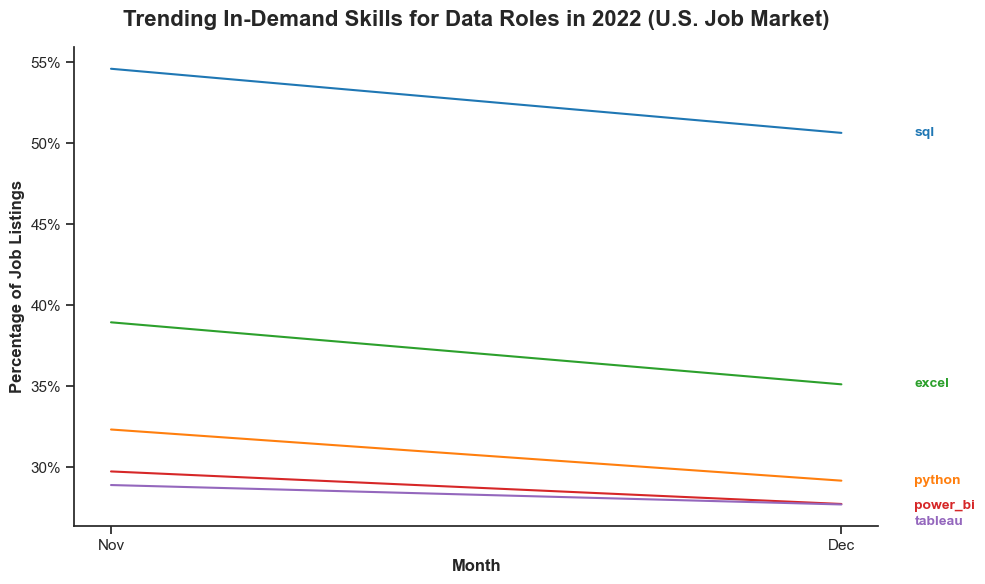

In [239]:
# In-Demand Skills Trends for Data Roles in 2022

# Import libraries
from matplotlib.ticker import PercentFormatter


# Prepare data (top 5 columns for plotting)
df_2022_line_plot = df_2022_percent.iloc[:, :5]

# Define custom color palette (colorblind-friendly)
palette = ['#1f77b4', '#2ca02c', '#ff7f0e', '#d62728', '#9467bd']

# Set theme and removing extra chart border
sns.set_theme(style='ticks')


# Create line plot
plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=df_2022_line_plot, dashes=False, palette=palette)

# Despine AFTER plotting
sns.despine(ax=ax, right=True, top=True)

# Title 
plt.title('Trending In-Demand Skills for Data Roles in 2022 (U.S. Job Market)', 
          fontsize=16, fontweight='bold', pad=15)

# Adjust label offsets to avoid overlap
offsets = [0, 0, 0, -0.1, -1.1]  # Adjust Y positions for each skill

# Axis labels
plt.xlabel('Month', fontsize=12, fontweight='bold')
plt.ylabel('Percentage of Job Listings', fontsize=12, fontweight='bold')

# Format y-axis as percentage
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))
plt.legend().remove()

# Annotating end of each line with the skill name
for i, column in enumerate(df_2022_line_plot.columns):
    y = df_2022_line_plot.iloc[-1, i] + offsets[i]
    plt.text(len(df_2022_line_plot) - 1 + 0.1, y, column,
             va='center', fontsize=10, fontweight='bold', color=palette[i])
    

# Layout adjustment
plt.tight_layout()
plt.show()

# 2022 U.S. Data Job Listing Salary

In [240]:
# Extract top 5 job titles in 2022

df_2022['clean_title'].value_counts().index[:5].to_list()

['Data Analyst',
 'Business Analyst',
 'Data Scientist',
 'Marketing Analyst',
 'Data Engineer']

In [241]:
# Place top 5 data titles in list named data_positions_2022

data_positions_2022 = df_2022['clean_title'].value_counts().index[:5].to_list()
data_positions_2022

['Data Analyst',
 'Business Analyst',
 'Data Scientist',
 'Marketing Analyst',
 'Data Engineer']

In [242]:
# Filter DataFrame for rows where data title is in the top data_positions_2022 list

df_2022_top_positions = df_2022[df_2022['clean_title'].isin(data_positions_2022)]
df_2022_top_positions.head(5)

,date_time,date,year,month,company_name,location,website,employment_type,remote_work,seniority_level,clean_title,salary_standardized,salary_hourly,salary_yearly,job_skills
4,2022-12-12 04:00:14.017393,2022-12-12,2022,12,Virgin Galactic,United States,virgin galactic careers,Full-Time,False,Senior,Data Analyst,NaN,NaN,NaN,"[power_bi, excel]"
5,2022-12-19 04:00:14.894872,2022-12-19,2022,12,Virgin Galactic,United States,virgin galactic careers,Full-Time,False,Senior,Data Analyst,NaN,NaN,NaN,"[power_bi, excel]"
6,2022-12-22 04:01:00.863214,2022-12-22,2022,12,Textron Aviation,"Wichita, KS",Talentify,Full-Time,False,,Data Analyst,NaN,NaN,NaN,"[excel, power_bi, c, sql, dax, alteryx]"
7,2022-12-25 04:00:11.277528,2022-12-25,2022,12,Virgin Galactic,United States,virgin galactic careers,Full-Time,False,Senior,Data Analyst,NaN,NaN,NaN,"[power_bi, excel]"
8,2022-12-26 04:00:10.996841,2022-12-26,2022,12,Virgin Galactic,United States,virgin galactic careers,Full-Time,False,Senior,Data Analyst,NaN,NaN,NaN,"[power_bi, excel]"


In [ ]:
df_2022_top_positions[['clean_title', 'salary_yearly']]

,clean_title,salary_yearly
4,True,False
5,True,False
6,True,False
7,True,False
8,True,False
...,...,...
5483,True,False
5484,True,True
5485,True,True
5486,True,True


In [243]:
# Group the DataFrame by clean title, calculate median yearly salary for each,
# Sorts the titles by median salary in descending order, and returns the sorted clean titles.

position_order_2022 = df_2022_top_positions.groupby('clean_title')['salary_yearly'].median().sort_values(ascending=False).index
position_order_2022

Index(['Data Scientist', 'Data Engineer', 'Data Analyst', 'Marketing Analyst',
       'Business Analyst'],
      dtype='object', name='clean_title')

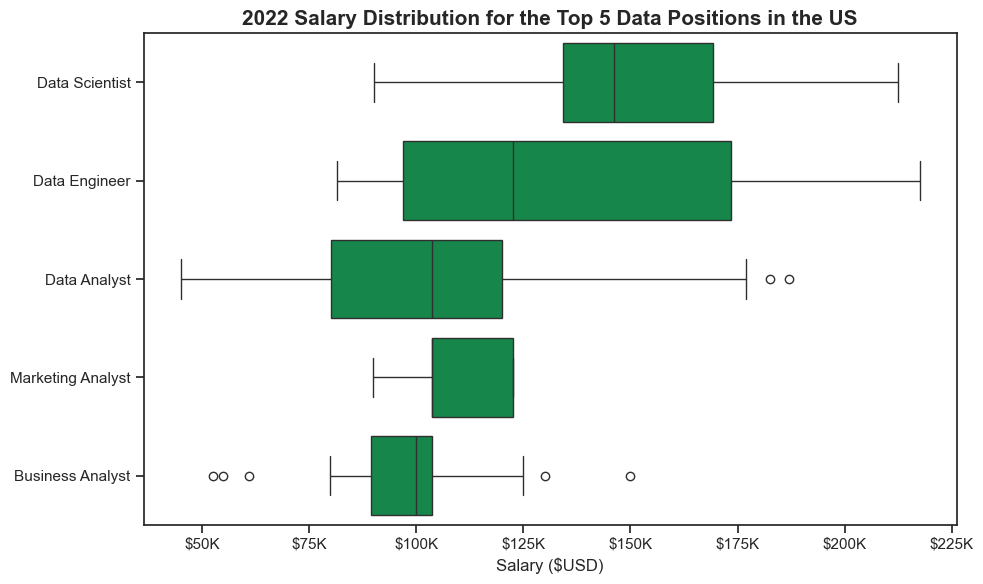

In [244]:
# Analyzing Salary Distribution of Popular Data Roles (2022)



# Create a Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_2022_top_positions, 
            x='salary_yearly', 
            y='clean_title',
            order=position_order_2022, color="#039949")

sns.set_theme(style='ticks')

plt.title('2022 Salary Distribution for the Top 5 Data Positions in the US', fontsize = 15, fontweight='bold')
plt.xlabel('Salary ($USD)')
plt.ylabel('')
ticks_x = plt.FuncFormatter(lambda x, pos : f'${int(x/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.tight_layout()
plt.show()

# Investigating 2022 U.S. Median Salary vs Skill for Analyst Job Listings

In [245]:
# Filtering Data Frame to hold only Analyst 2022 job listings

df_2022_analyst = df_2022[
    df_2022['clean_title'].str.contains('analyst', case=False, na=False)
].copy()

df_2022_analyst.head(5)

,date_time,date,year,month,company_name,location,website,employment_type,remote_work,seniority_level,clean_title,salary_standardized,salary_hourly,salary_yearly,job_skills
0,2022-11-11 04:00:18.720591,2022-11-11,2022,11,Harnham US,United States,harnham,Full-Time,False,Manager,Operations Data Analyst,NaN,NaN,NaN,"[excel, spss]"
1,2022-11-21 04:00:16.457704,2022-11-21,2022,11,Virgin Galactic,United States,virgin galactic careers,Full-Time,False,Senior,Operations Data Analyst,NaN,NaN,NaN,"[power_bi, excel]"
2,2022-12-04 04:00:18.029007,2022-12-04,2022,12,Virgin Galactic,United States,virgin galactic careers,Full-Time,False,Senior,Operations Data Analyst,NaN,NaN,NaN,"[power_bi, excel]"
3,2022-12-05 04:00:29.806277,2022-12-05,2022,12,Virgin Galactic,United States,virgin galactic careers,Full-Time,False,Senior,Operations Data Analyst,NaN,NaN,NaN,"[power_bi, excel]"
4,2022-12-12 04:00:14.017393,2022-12-12,2022,12,Virgin Galactic,United States,virgin galactic careers,Full-Time,False,Senior,Data Analyst,NaN,NaN,NaN,"[power_bi, excel]"


In [246]:
# Drop all NaN salary_yearly values

df_2022_analyst = df_2022_analyst.dropna(subset=['salary_yearly'])
df_2022_analyst.head(5)

,date_time,date,year,month,company_name,location,website,employment_type,remote_work,seniority_level,clean_title,salary_standardized,salary_hourly,salary_yearly,job_skills
14,2022-12-29 00:19:20.229733,2022-12-29,2022,12,"Acadia Technologies, Inc.",United States,dice,Full-Time,False,,Data Analyst,70000.0,NaN,70000.0,"[ssis, sql]"
15,2022-11-09 04:00:16.330489,2022-11-09,2022,11,rays technologies,United States,fox4kc jobs,Full-Time,False,,Data Analyst,95000.0,NaN,95000.0,"[hadoop, aws, postgresql, sharepoint]"
16,2022-11-22 04:00:11.811065,2022-11-22,2022,11,EDWARD JONES,"Chamois, MO",wdhn jobs,Full-Time,False,,Data Analyst,103781.0,NaN,103781.0,"[power_bi, excel, sas, snowflake, sql, spss, r..."
17,2022-11-22 04:00:16.103200,2022-11-22,2022,11,EDWARD JONES,"Nixa, MO",wtrf jobs,Full-Time,False,Senior,Marketing Analyst,122470.5,NaN,122470.5,"[tableau, excel, sas, hadoop, power_bi, pl/sql..."
84,2022-12-21 04:00:21.181553,2022-12-21,2022,12,Jobot,"Stillwater, OK",dice,Full-Time,False,,Data Analyst,65000.0,NaN,65000.0,[]


In [247]:
# Expand the 'job_skills' list into separate rows for each skill

df_2022_analyst = df_2022_analyst.explode('job_skills')


# Preview salary and skill data after exploding for further analysis

df_2022_analyst[['salary_yearly', 'job_skills']].head(5)

,salary_yearly,job_skills
14,70000.0,ssis
14,70000.0,sql
15,95000.0,hadoop
15,95000.0,aws
15,95000.0,postgresql


In [248]:
# Extract Top Salary for Analyst position across all job skills

df_2022_analyst.groupby('job_skills')['salary_yearly'].agg(['count', 'median']).sort_values(by='median', ascending=False)

,count,median
job_skills,,
mssql,2,175000.0
t-sql,4,132775.0
cognos,3,132315.0
looker,15,130000.0
numpy,2,127500.0
...,...,...
mysql,7,79750.0
matlab,2,72500.0
shell,1,72500.0


In [249]:
# Extract Top Salary for Analyst position across all job skills.
# Place extracted data into new Data Frame

df_2022_top_analyst_salary = (df_2022_analyst
                      .groupby('job_skills')['salary_yearly']
                      .agg(['count', 'median'])
                      .sort_values(by='median', ascending=False)
                    )
df_2022_top_analyst_salary.head(5)

,count,median
job_skills,,
mssql,2,175000.0
t-sql,4,132775.0
cognos,3,132315.0
looker,15,130000.0
numpy,2,127500.0


In [250]:
# Extract top 10 2022 salaries for Analyst positions 

df_2022_top_analyst_salary = df_2022_top_analyst_salary.head(10)
df_2022_top_analyst_salary

,count,median
job_skills,,
mssql,2,175000.0
t-sql,4,132775.0
cognos,3,132315.0
looker,15,130000.0
numpy,2,127500.0
spark,5,127500.0
pyspark,3,127500.0
matplotlib,3,127500.0
pl/sql,14,122470.5


In [251]:
# Explode skills for the analyst-filtered DataFrame

df_2022_analyst_exploded = df_2022_analyst.explode('job_skills')
df_2022_analyst_exploded.head(5)


,date_time,date,year,month,company_name,location,website,employment_type,remote_work,seniority_level,clean_title,salary_standardized,salary_hourly,salary_yearly,job_skills
14,2022-12-29 00:19:20.229733,2022-12-29,2022,12,"Acadia Technologies, Inc.",United States,dice,Full-Time,False,,Data Analyst,70000.0,NaN,70000.0,ssis
14,2022-12-29 00:19:20.229733,2022-12-29,2022,12,"Acadia Technologies, Inc.",United States,dice,Full-Time,False,,Data Analyst,70000.0,NaN,70000.0,sql
15,2022-11-09 04:00:16.330489,2022-11-09,2022,11,rays technologies,United States,fox4kc jobs,Full-Time,False,,Data Analyst,95000.0,NaN,95000.0,hadoop
15,2022-11-09 04:00:16.330489,2022-11-09,2022,11,rays technologies,United States,fox4kc jobs,Full-Time,False,,Data Analyst,95000.0,NaN,95000.0,aws
15,2022-11-09 04:00:16.330489,2022-11-09,2022,11,rays technologies,United States,fox4kc jobs,Full-Time,False,,Data Analyst,95000.0,NaN,95000.0,postgresql


In [252]:
# Place extracted data into a new DataFrame from the correct exploded DataFrame

df_2022_analyst_skill = (
    df_2022_analyst_exploded
    .groupby('job_skills')['salary_yearly']
    .agg(['count', 'median'])
    .sort_values(by='count', ascending=False)
)

df_2022_analyst_skill

,count,median
job_skills,,
sql,242,103781.0
excel,166,103781.0
python,145,103781.0
power_bi,141,103781.0
tableau,119,103781.0
...,...,...
crystal,1,100550.0
css,1,95000.0
powerpoints,1,79930.0


In [253]:
# Select top 10 Analyst skills 

df_2022_analyst_skill = (df_2022_analyst_skill.head(10)
                         .sort_values(by='median', ascending=False)
                        )
df_2022_analyst_skill

,count,median
job_skills,,
sql,242,103781.0
excel,166,103781.0
python,145,103781.0
power_bi,141,103781.0
tableau,119,103781.0
r,105,103781.0
snowflake,68,103781.0
sas,60,103781.0
spss,44,103781.0


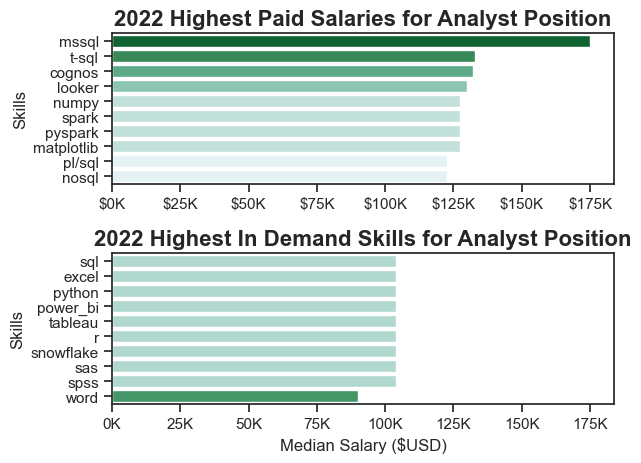

In [284]:
# The Most Lucrative Skills for Analyst Roles (2022)


# Importing libraries
import ast

# Setting figure for visuals
fig, ax = plt.subplots(2, 1)


# Setting visual theme style and colour palette
sns.set_theme(style='ticks')
palette = sns.color_palette('BuGn', n_colors=6)


# Top 10 Highest Paid Salaries for Analyst Positions
palette = sns.color_palette('BuGn', n_colors=6)
sns.barplot(data=df_2022_top_analyst_salary, x='median', 
            y=df_2022_top_analyst_salary.index, ax = ax[0], 
            hue='median', palette=palette, legend=False
            )


ax[0].set_title('2022 Highest Paid Salaries for Analyst Position', fontsize=16, fontweight='bold')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _ : f'${int(x/1000)}K'))
ax[0].set_ylabel('Skills')


# Top 10 Most In Demand Skills for Analyst Positions

palette = sns.color_palette('BuGn_r', n_colors=2)
sns.barplot(data=df_2022_analyst_skill, x='median', 
            y=df_2022_analyst_skill.index, ax = ax[1],
            hue='median', palette=palette, legend=False
            )


ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_title('2022 Highest In Demand Skills for Analyst Position', fontsize=16, fontweight='bold')
ax[1].set_xlabel('Median Salary ($USD)')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _ : f'{int(x/1000)}K'))
ax[1].set_ylabel('Skills')

fig.tight_layout()
plt.show()

In [255]:
# Verifying job_skill empty lists

df_2022_analyst[df_2022_analyst['job_skills'].apply(lambda x: isinstance(x, list) and len(x) == 0)]

,date_time,date,year,month,company_name,location,website,employment_type,remote_work,seniority_level,clean_title,salary_standardized,salary_hourly,salary_yearly,job_skills


In [256]:
# Place extracted data into new Data Frame

df_2022_analyst_skill_explode = df_2022_analyst.explode('job_skills')

# Verifying top 10 salaries and their corresponding job skills

df_2022_analyst_skill_explode[['salary_yearly', 'job_skills']].head(10)

,salary_yearly,job_skills
14,70000.0,ssis
14,70000.0,sql
15,95000.0,hadoop
15,95000.0,aws
15,95000.0,postgresql
15,95000.0,sharepoint
16,103781.0,power_bi
16,103781.0,excel
16,103781.0,sas
16,103781.0,snowflake


In [257]:
# Place extracted data into a new DataFrame

df_2022_analyst_skills = (df_2022_analyst_skill_explode
                          .groupby('job_skills')['salary_yearly']
                          .agg(['count', 'median'])
                          .sort_values(by='count',ascending=False )
                         )

df_2022_analyst_skills

,count,median
job_skills,,
sql,242,103781.0
excel,166,103781.0
python,145,103781.0
power_bi,141,103781.0
tableau,119,103781.0
...,...,...
crystal,1,100550.0
css,1,95000.0
powerpoints,1,79930.0


In [258]:
# Renaming the columns in new Data Frame for clarity

df_2022_analyst_skills = (df_2022_analyst_skills
                          .rename(columns=
                                  {'count' : 'skill_count', 
                                   'median': 'median_salary'})
                        )

df_2022_analyst_skills

,skill_count,median_salary
job_skills,,
sql,242,103781.0
excel,166,103781.0
python,145,103781.0
power_bi,141,103781.0
tableau,119,103781.0
...,...,...
crystal,1,100550.0
css,1,95000.0
powerpoints,1,79930.0


In [259]:
# Calculating the number of job listings for 2022, by taking the length of the data frame df_2022
# Place results in a variable named df_2022_analyst_job_count

df_2022_analyst_job_count = len(df_2022_analyst)
df_2022_analyst_job_count

1539

In [261]:
# Creating a new column for df_2022_analyst_skills named ['skill_percent']
# ['skill_percent'] will hold the percentage calculation below

df_2022_analyst_skills['skill_percent'] = (df_2022_analyst_skills['skill_count'] 
                                           / df_2022_analyst_job_count * 100
                                        )
df_2022_analyst_skills

,skill_count,median_salary,skill_percent
job_skills,,,
sql,242,103781.0,15.724496
excel,166,103781.0,10.786225
python,145,103781.0,9.421702
power_bi,141,103781.0,9.161793
tableau,119,103781.0,7.732294
...,...,...,...
crystal,1,100550.0,0.064977
css,1,95000.0,0.064977
powerpoints,1,79930.0,0.064977


In [262]:
# Define a minimum percentage threshold to filter out less common skills
# This helps to reduce visual clutter in graphs by focusing only on more prevalent skills

min_2022_skill_threshold = 7  # Only include skills that appear in more than 2% of job skills

# Filter the analyst skills DataFrame based on the threshold and create a new DataFrame

df_2022_analyst_skills_filtered = (df_2022_analyst_skills
                                   [df_2022_analyst_skills['skill_percent'] 
                                    > min_2022_skill_threshold]
                                )

df_2022_analyst_skills_filtered

,skill_count,median_salary,skill_percent
job_skills,,,
sql,242,103781.0,15.724496
excel,166,103781.0,10.786225
python,145,103781.0,9.421702
power_bi,141,103781.0,9.161793
tableau,119,103781.0,7.732294


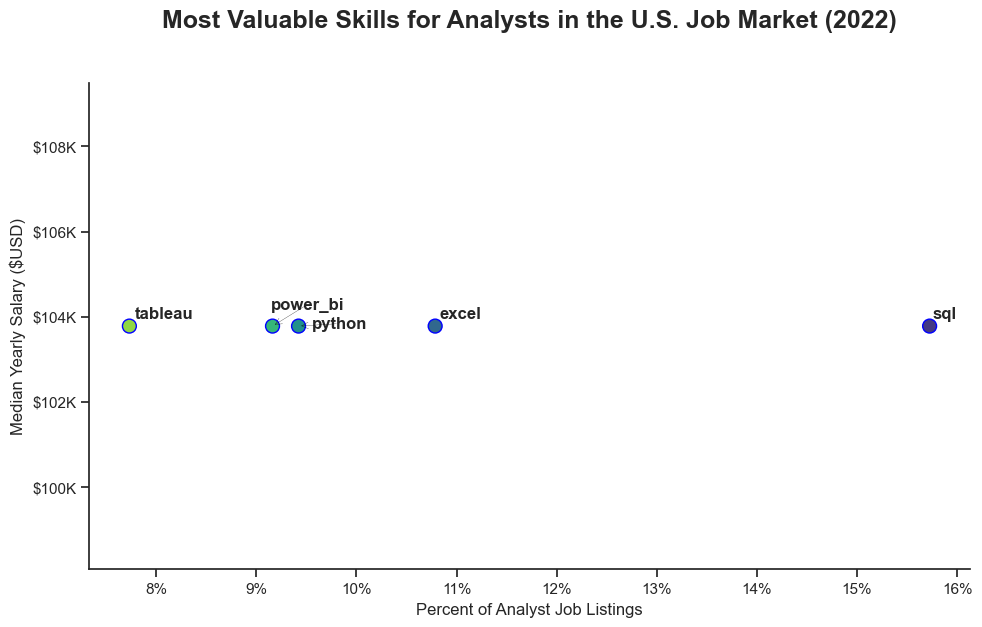

In [268]:
# Top Analyst Skills in the U.S. (2022)

# Import libraries
from matplotlib.ticker import PercentFormatter
from adjustText import adjust_text


# Set theme and colour palette
sns.set_theme(style='ticks')
palette = sns.color_palette('viridis', len(df_2022_analyst_skills_filtered))  

# Create figure
fig, ax = plt.subplots(figsize=(10, 6))

# Colour each point uniquely based on skill
scatter = ax.scatter(
    x=df_2022_analyst_skills_filtered['skill_percent'],
    y=df_2022_analyst_skills_filtered['median_salary'],
    c=palette,
    s=100,  # Increase scatter dot size for better visibility
    edgecolor='blue' 
)

# Add text labels
text = []
for i, txt in enumerate(df_2022_analyst_skills_filtered.index):
    text.append(ax.text(
        df_2022_analyst_skills_filtered['skill_percent'].iloc[i],
        df_2022_analyst_skills_filtered['median_salary'].iloc[i],
        txt,
        fontsize=12, 
        va ='bottom', 
        fontweight= 'bold'
    ))

adjust_text(text, arrowprops=dict(arrowstyle='->', color='black', lw=.2), fontweight='bold')

# Format x-axis and y-axis
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'${int(y/1000)}K'))

# Remove all spines 
sns.despine(ax=ax, top=True, right=True, left=False, bottom=False)

# Set labels and title
ax.set_xlabel('Percent of Analyst Job Listings', fontsize=12)
ax.set_ylabel('Median Yearly Salary ($USD)', fontsize=12)
ax.set_title('Most Valuable Skills for Analysts in the U.S. Job Market (2022)', fontsize=18, fontweight='bold', pad=40)

plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()